In [1]:
import glob
import re
from astropy.io import fits
from astropy.table import Table
import numpy
import seaborn as sns
import pylab
from matplotlib import colors
import matplotlib
import matplotlib.tri as tri

In [2]:
def timingplot( pattern ):
    files = glob.glob(pattern)
    results = []
    for afile in files:
        with fits.open(afile) as f:
            ret = re.search("v25_(?P<ISO1>.*)_(?P<ISO2>.*).seq",f[0].header["SEQFILE"]).groupdict()
            ret.update({ "std({:02d})".format(i): f[i].data[10:2000,522:].std() for i in range(1,17) } )
        results.append(ret)
    table = Table(results)
    table.meta = fits.open(files[0])[0].header

    cond=table["std(01)"]<1000    # data corruption rejection
    filtered = table[cond].group_by(["ISO1","ISO2"]).groups.aggregate(numpy.mean)

    iso1 = filtered["ISO1"].astype(numpy.int32)
    iso2 = filtered["ISO2"].astype(numpy.int32)

    x = numpy.arange(iso1.min(), iso1.max())

    fig, axs = pylab.subplots(4, 4, figsize=(15,10),facecolor='w')
    for i, ax in enumerate(axs.flatten()):
        key = "std({:02d})".format(i+1)
        z=filtered[key]
        levels = numpy.arange(5,25,1)
        ax.tricontour(iso1,iso2,z,colors="k",levels=levels)
        cntr = ax.tricontourf(iso1,iso2,z, cmap="Greys",levels=levels)
        fig.colorbar(cntr, ax=ax,location="right",orientation="vertical",label="noise")
        ax.set_xlabel("ISO1 [ns]")
        ax.set_ylabel("ISO2 [ns]")
        ax.plot( [180] , [340], "ro" )
        ax.plot( x, -(x-180)+340, "r-" )
        ax.set_title(key)
        ax.set_xlim( iso1.min(), iso1.max() )
        ax.set_ylim( iso2.min(), iso2.max() )
    pylab.suptitle(" ".join([ table.meta[akey] for akey in ["RAFTNAME","RAFTBAY","CCDSLOT"] ]))
    pylab.tight_layout()
    pylab.show()

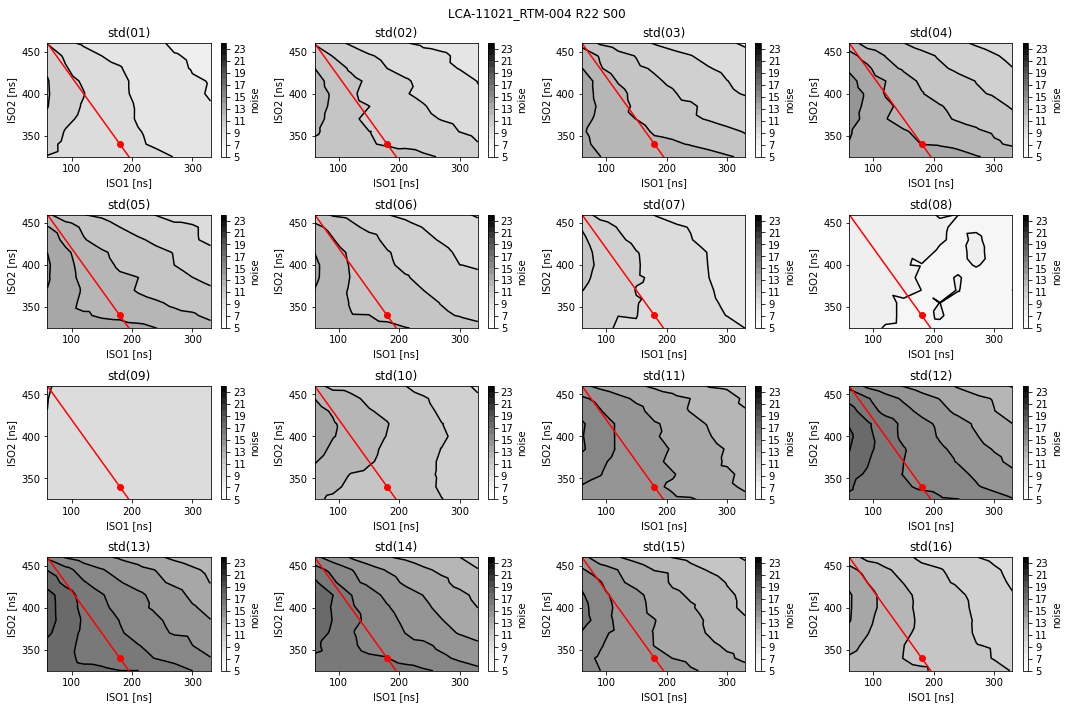

In [3]:
timingplot("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210623timing/*/*S00.fits")

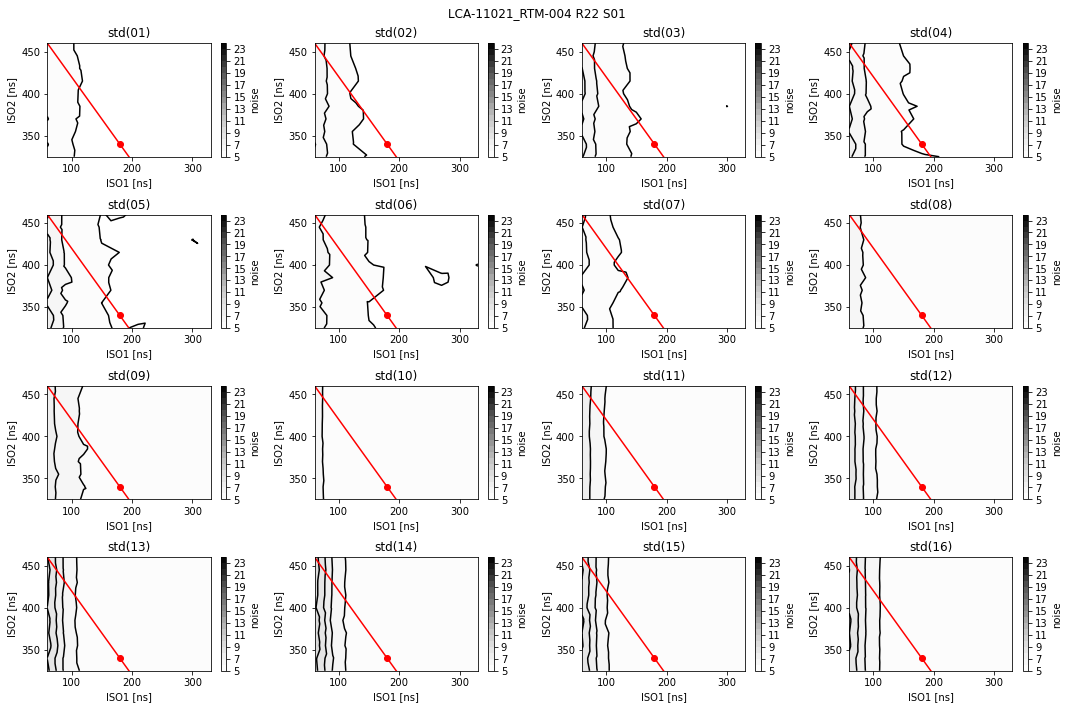

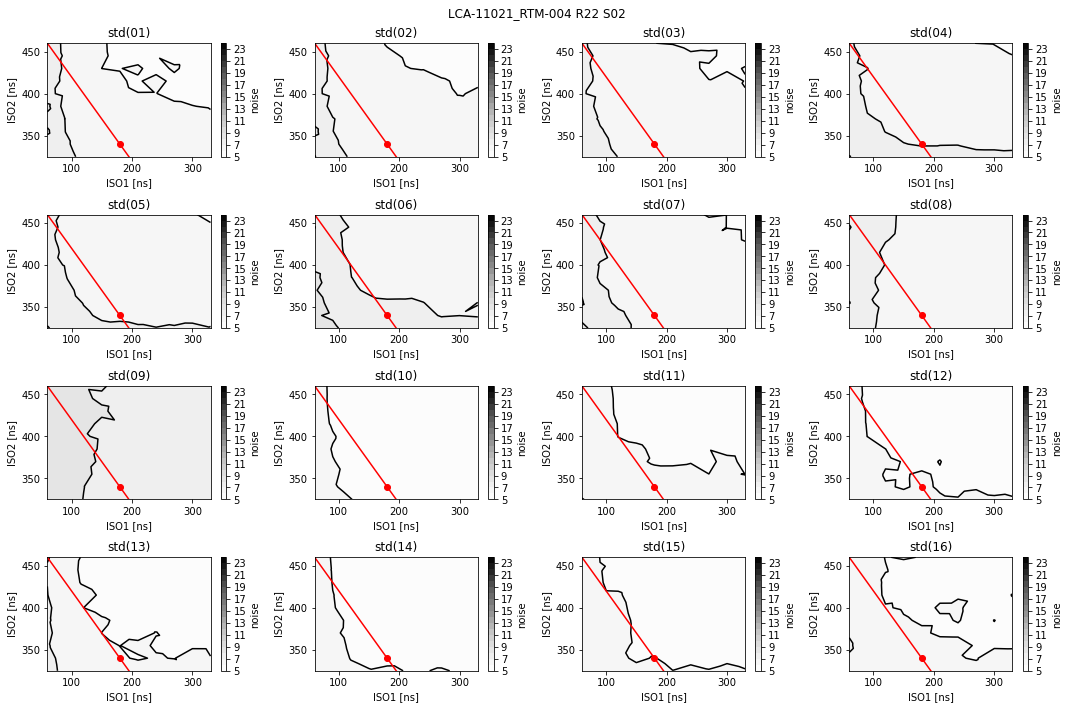

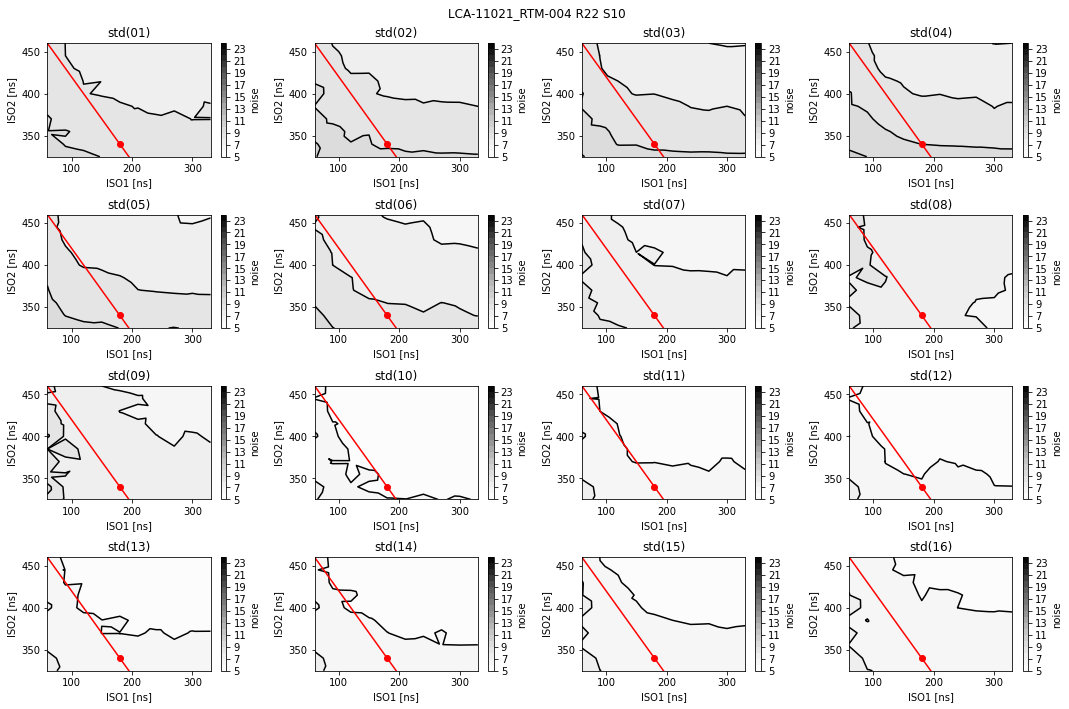

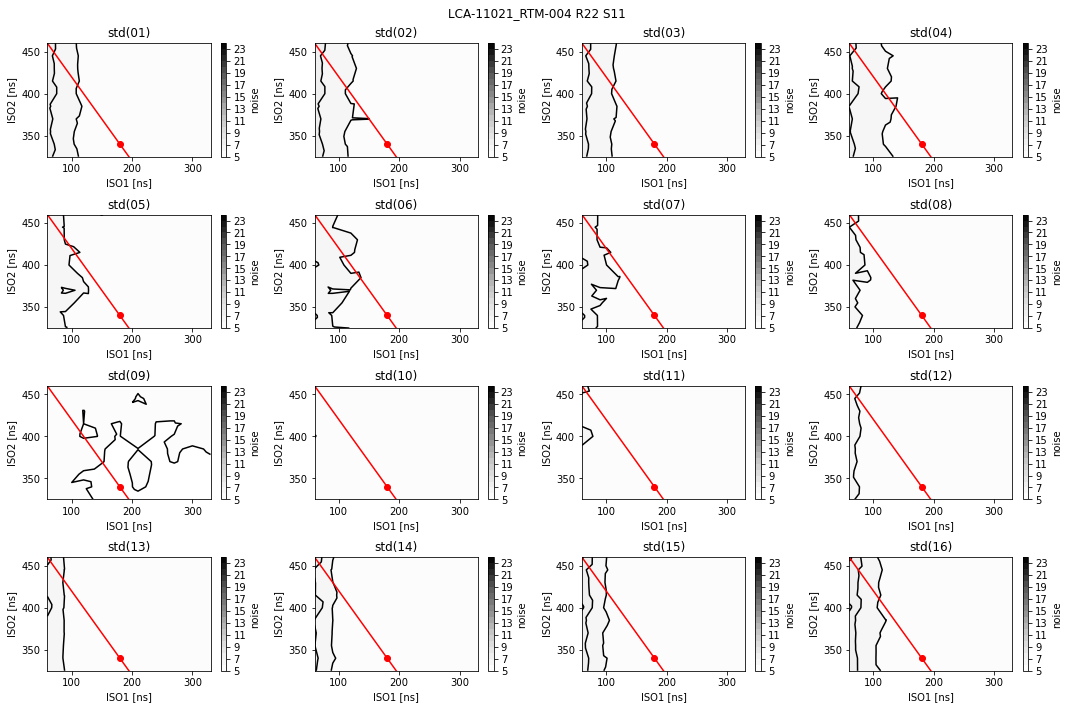

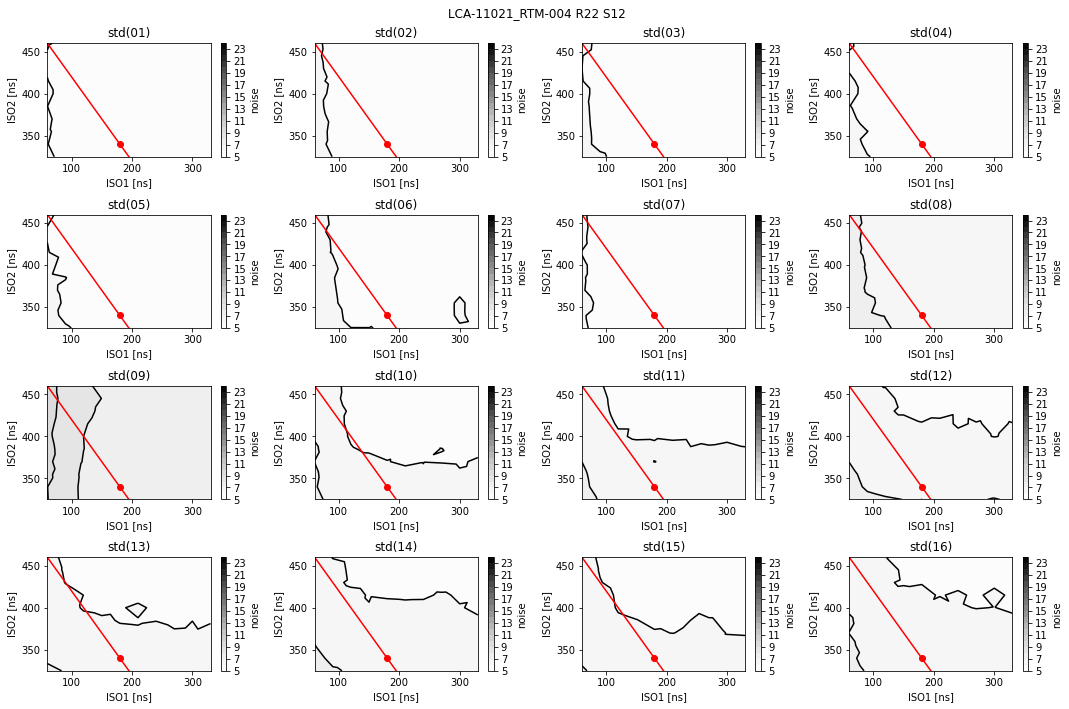

<ipython-input-2-666221d2341a>:25: UserWarning: No contour levels were found within the data range.
  ax.tricontour(iso1,iso2,z,colors="k",levels=levels)
<ipython-input-2-666221d2341a>:25: UserWarning: No contour levels were found within the data range.
  ax.tricontour(iso1,iso2,z,colors="k",levels=levels)
<ipython-input-2-666221d2341a>:25: UserWarning: No contour levels were found within the data range.
  ax.tricontour(iso1,iso2,z,colors="k",levels=levels)
<ipython-input-2-666221d2341a>:25: UserWarning: No contour levels were found within the data range.
  ax.tricontour(iso1,iso2,z,colors="k",levels=levels)


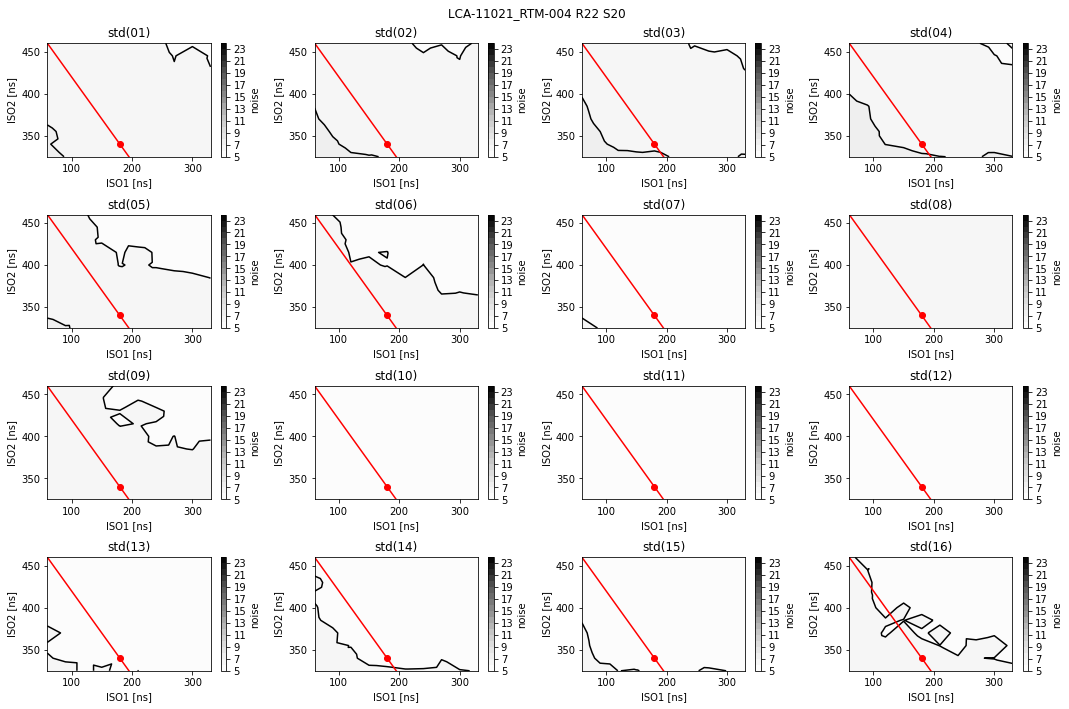

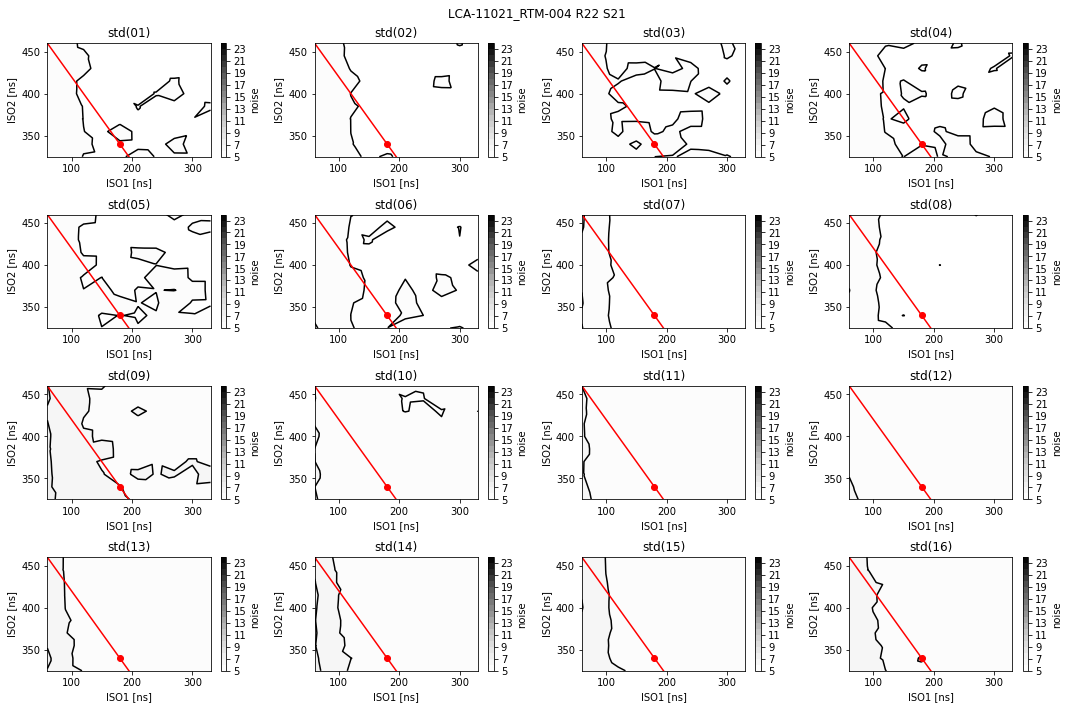

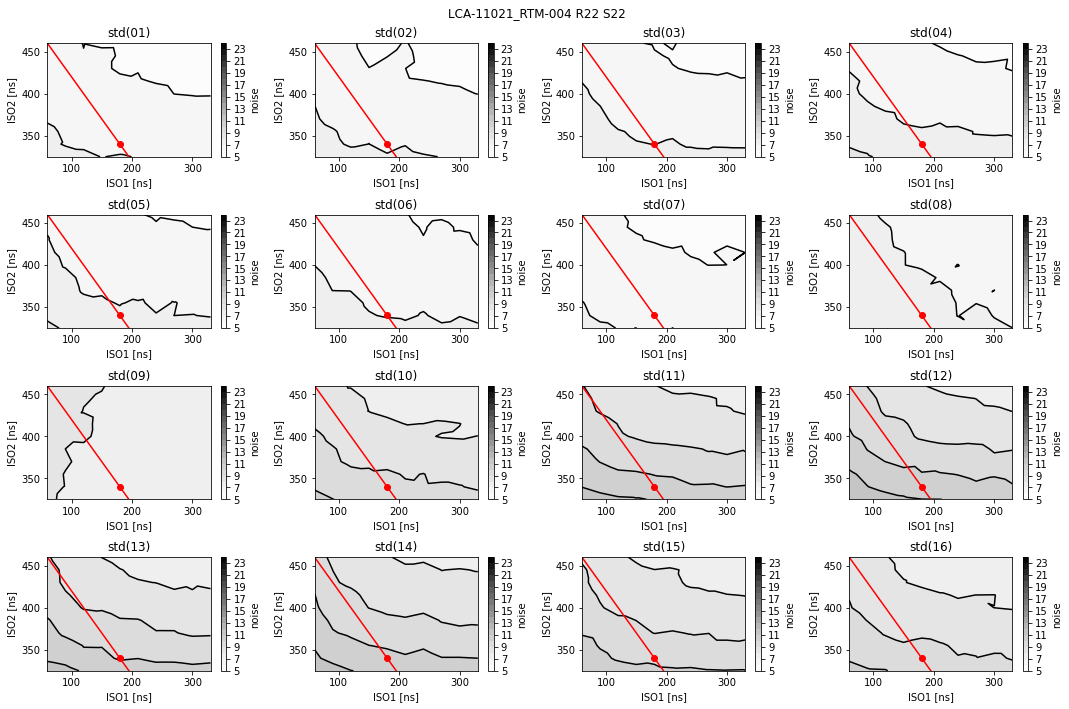

In [4]:
for asensor in [ "S01", "S02", "S10", "S11", "S12", "S20", "S21", "S22" ]:
    timingplot("/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210623timing/*/*{}.fits".format(asensor))